# Mapping solar radiation and potential evapotranspiration on a DEM

This example uses radiation and potential evapotranspiration (PET) components. It uses DEM as input. Outputs are fields of: PET and solar radiation (incoming, net, and relative). Relative radiation is the ratio of shortwave radiation on a sloped surface to shortwave radiation on a flat surface for a given DOY and latitude. This ratio is used to scale net radiation on a flat surface across a watershed as well as to scale PET across the domain. 


The component offers four different ways of setting PET on flat surface.
Options: PET for flat surface can be set using one of the four methods below, presented with the  same name used in the instantiation of the component

‘Constant’:  A user-defined daily PET rate. 

‘PriestleyTaylor’:  Priestley-Taylor equation with modeled radiation based on methods described in the ASCE-EWRI (2005).

ASCE-EWRI. 2005. The ASCE Standardized Reference Evapotranspiration Equation. R. G. Allen, I. A. Walter, R. L. Elliot, T. A. Howell, D. Itenfisu, M. E. Jensen, and R. L. Snyder, eds. Standardization of Reference Evapotranspiration Task Committee Final Report. Reston, Va.: ASCE Environmental and Water Resources Institute (EWRI).

Parameters used in component instantiation: priestly_taylor_const= , albedo=,             latent_heat_of_vaporization=28.34, psychometric_const= ,stefan_boltzmann_const=0.0000000567, solar_const=1366.67, latitude=34., elevation_of_measurement=, adjustment_coeff=0.18.

 ‘MeasuredRadiationPT’: Priestley-Taylor equation with net radiation on flat surface given as input by user.

‘Cosine’: A cosine function is used to represent seasonal behavior of PET. PET value obtained from current time and parameters of the cosine function. 

Parameters used in component instantiation:  
Lag time between the peak of PET and solar forcing peak lt=  ; number of days in a year, nd=365,  Mean annual daily PET, MeanTmaxF=  ; difference between the maximum and minimum values of daily PET, delta_d=  ; Parameters explained in (equation 36) of Istanbulluoglu and Bras (2006). 

Istanbulluoglu, E., and R. L. Bras (2006), On the dynamics of soil moisture, vegetation, and erosion: Implications of climate variability and change, Water Resour. Res., 42, W06418, doi:10.1029/2005WR004113.

First list libraries and componets needed for this notebok


In [2]:
import numpy as np
from landlab.components import Radiation
from landlab.components import PotentialEvapotranspiration
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid
from landlab.plot.imshow import imshow_grid_at_cell
%matplotlib inline


/Users/erkan/landlab/landlab/components/stream_power/stream_power.py:18: UserWarning: Unable to import stream_power extension module.
  warnings.warn('Unable to import stream_power extension module.')
/Users/erkan/landlab/landlab/components/gflex/flexure.py:35: UserWarning: gFlex not installed.
  warnings.warn("gFlex not installed.")
To use the gFlex component you must have gFlex installed on your machine.
For installation instructions see gFlex on GitHub:

  https://github.com/awickert/gFlex


Read an existing esri grid as watershed and map the elevation field

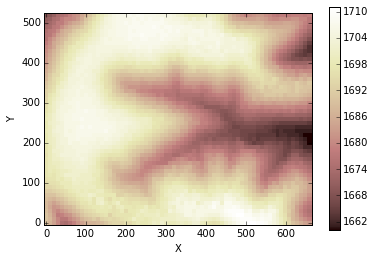

In [3]:
(watershed,z)=read_esri_ascii('DEM_10m.asc', name='topographic__elevation')
imshow_grid(watershed, 'topographic__elevation')


check input and output names

In [11]:
PotentialEvapotranspiration.input_var_names
sorted(PotentialEvapotranspiration.output_var_names)

['radiation__incoming_shortwave_flux',
 'radiation__net_flux',
 'radiation__net_longwave_flux',
 'radiation__net_shortwave_flux',
 'surface__potential_evapotranspiration_rate']

instantiate the radiation and PET components. Here only change the parameters that you would like to change

In [4]:
rad = Radiation(watershed, method='Grid', latitude=34.)
PET=PotentialEvapotranspiration(watershed, method='PriestlyTaylor', albedo=0.2, latitude=34., elevation_of_measurement=2, )

Set the current time (0-1) in a year, (ie., DOY/365)


In [5]:
current_time=0.5   # 0: beginning of the calender year 0.5: middle of the year
rad.update(current_time)
PET.update(current_time, Tmin=15, Tmax=30.0, Tavg=22)  # Daily min, max, and average temperature


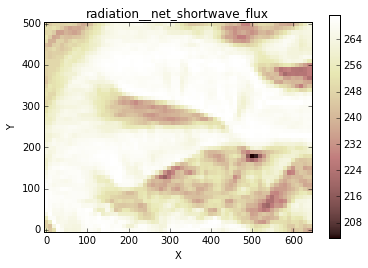

In [6]:
imshow_grid_at_cell(watershed,'radiation__net_shortwave_flux')


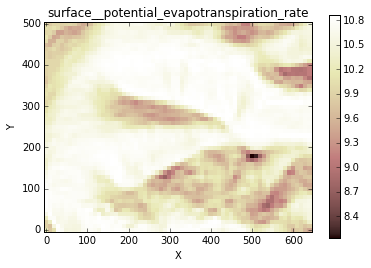

In [7]:
imshow_grid_at_cell(watershed,'surface__potential_evapotranspiration_rate')


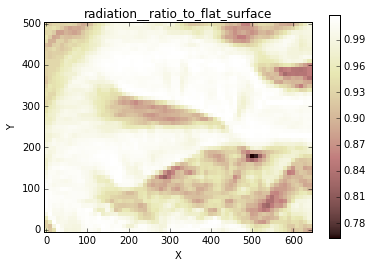

In [8]:
imshow_grid_at_cell(watershed,'radiation__ratio_to_flat_surface')
